In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 7s 8ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 5/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6926 - val_loss: 0.6926


Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6933 - val_loss: 0.693

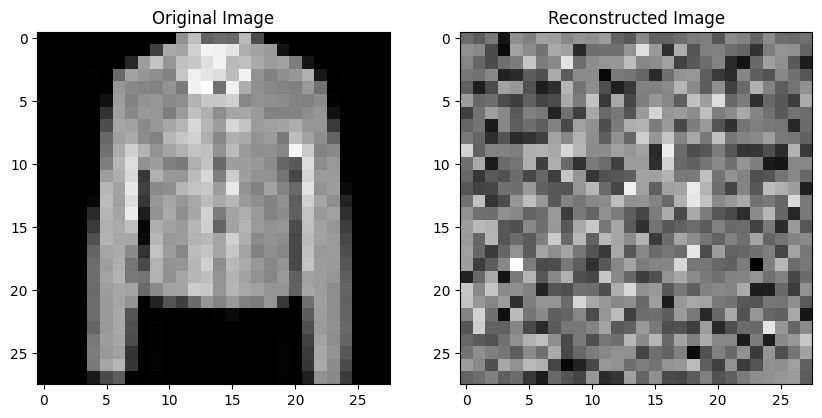

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input shape
input_shape = (784,)

# Define encoding dimensions
encoding_dim1 = 64
encoding_dim2 = 32

# Define input layer
input_img = Input(shape=input_shape)

encoded1 = Dense(encoding_dim1, activation='relu')(input_img)
encoded2 = Dense(encoding_dim2, activation='relu')(encoded1)
decoded1 = Dense(encoding_dim1, activation='relu')(encoded2)
decoded2 = Dense(input_shape[0], activation='sigmoid')(decoded1)
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize reconstructed image and original image
import matplotlib.pyplot as plt

# Choose an index of a test image to visualize
idx = 10

# Reshape the test image
test_img = x_test[idx].reshape(28, 28)

# Reshape the reconstructed image
reconstructed_img = decoded_imgs[idx].reshape(28, 28)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/200
235/235 [==============================] - 2s 6ms/step - loss: 0.6963 - accuracy: 0.0014 - val_loss: 0.6962 - val_accuracy: 0.0010
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6960 - accuracy: 0.0014 - val_loss: 0.6959 - val_accuracy: 9.0000e-04
Epoch 3/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6957 - accuracy: 0.0015 - val_loss: 0.6956 - val_accuracy: 9.0000e-04
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6954 - accuracy: 0.0015 - val_loss: 0.6954 - val_accuracy: 9.0000e-04
Epoch 5/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6952 - accuracy: 0.0015 - val_loss: 0.6951 - val_accuracy: 9.0000e-04
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.0014 - val_loss: 0.6948 - val_accuracy: 9.0000e-04
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.0015 - val_loss: 0.6946 - 

313/313 [==============================] - 2s 5ms/step


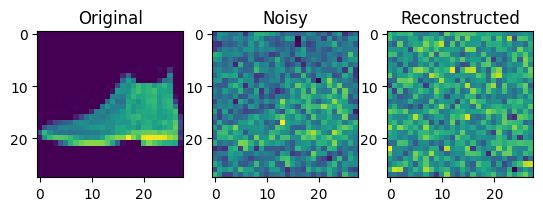

In [ ]:
import matplotlib.pyplot as plt

# Get the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Select one image to display
img_to_display = 0

# Display the original, noisy, and reconstructed images side by side
plt.subplot(1, 3, 1)
plt.imshow(x_test[img_to_display].reshape(28, 28))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[img_to_display].reshape(28, 28))
plt.title('Noisy')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs[img_to_display].reshape(28, 28))
plt.title('Reconstructed')

plt.show()


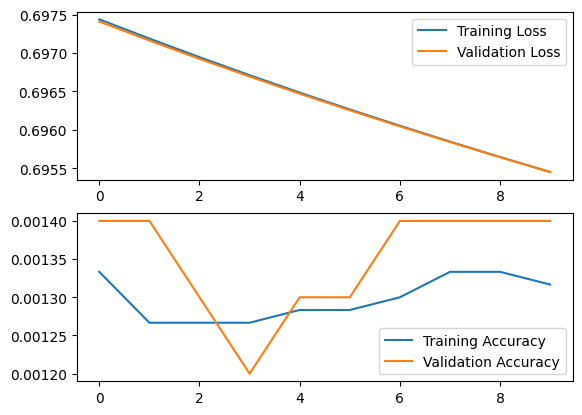

In [ ]:
# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()
